# Blackbody Radiation & Stellar Properties

* Paradoxical as it may sound, the light emitted by a star is approximately described by the radiation of a black body. The term black body refers to its property of perfectly absorbing incident radiation at all wavelengths. At the same time, a black body is an ideal emitter of thermal radiation. This is to say that stars emit thermal radiation produced in their outer layers, which have temperatures between a few thousand and tens of thousands of K, depending on the mass and evolutionary stage of the star.
* The radiation of a black body refers to the electromagnetic radiation emitted by an idealized physical body that absorbs all incident electromagnetic radiation, regardless of frequency or angle of incidence. A black body is a perfect absorber (and emitter) of radiation. The concept is an important principle in the field of thermodynamics, physics, and astronomy, particularly for understanding the nature of stars and other celestial bodies.
* The radiation emitted by a black body is solely a function of its temperature. This radiation has a characteristic spectrum that depends on the temperature of the black body.
* Black body radiation has been instrumental in the development of quantum mechanics and has applications in various fields, including astronomy (e.g., understanding the radiation of stars), climate science, and material science.
* The total energy emitted by a black body per unit time is related to its surface area and temperature. This relation is called the Stefan–Boltzmann law. The spectral distribution of the emitted radiation is given by Planck function. The spectrum of black body radiation and its intensity at various frequencies are described by Planck's Law. The total energy radiated per unit surface area of a black body across all wavelengths per unit time (also known as the black body's radiant exitance or emissive power) is directly proportional to the fourth power of the black body's thermodynamic temperature.
## Stefan–Boltzmann Law
* The Stefan–Boltzmann Law is a principle in thermodynamics that states the total energy radiated per unit surface area of a black body across all wavelengths per unit time (also known as the black body's radiant exitance or emissive power) is directly proportional to the fourth power of the black body's thermodynamic temperature.
* A star is characterised by its effective temperature $T_{eff}$ and luminosity $L$ (i.e. the total energy emitted as radiation per unit time). The effective temperature corresponds to the temperature of a black body radiating the same energy per unit surface area and unit time over all wavelengths as the star. This is expressed by the **Stefan–Boltzmann law**:
> $j^* = \sigma T^4$

where:

$j^*$ or $F$: the total energy radiated per unit surface area per unit time

$\sigma$: the Stefan–Boltzmann constant ($5.670374419 \times 10^{-8} Wm^{-2}K^{-4}$)

$T$: the absolute temperature of the black body in Kelvin (K).

The radiative flux $F$ or $j^*$ is the net energy radiated away per unit surface area and unit time.

* Luminosity in astrophysics and cosmology is the total amount of energy emitted by a star, galaxy, or other astronomical object per unit of time. It's a measure of the electromagnetic energy output and is a key property in the study of stellar and galactic astronomy.
* Integrating the radiative flux over the whole surface of a star of radius R, we obtain the **luminosity**:

> $L = 4\pi R^2 \sigma T^4$

where:

$L$: the luminosity

$R$: the radius of the star

$\sigma$: the Stefan–Boltzmann constant ($5.670374419 \times 10^{-8} Wm^{-2}K^{-4}$)

$T$: the effective surface temperature of the star in Kelvin

This formula assumes the star is a perfect black body (which most stars approximate well) and uses the Stefan–Boltzmann Law to calculate the total energy output.



In [1]:
%%capture
!pip install astropy

In [2]:
import math
from scipy.constants import sigma # Stefan-Boltzmann constant
from astropy.constants import R_sun,L_sun,sigma_sb
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("dark_background")
%matplotlib inline

In [3]:
print(f"Stefan-Boltzmann constant: {sigma}")

Stefan-Boltzmann constant: 5.670374419e-08


In [4]:
print(f"Stefan-Boltzmann constant - SB: {sigma_sb}")

Stefan-Boltzmann constant - SB: 5.6703744191844314e-08 W / (m2 K4)


In [5]:
print(f"Radius us of Sun: {R_sun}")
print(f"Luminosity of Sun: {L_sun}")

Radius us of Sun: 695700000.0 m
Luminosity of Sun: 3.828e+26 W


In [6]:
print(f"Luminosity of Sun Reference:\n{L_sun.reference}")

Luminosity of Sun Reference:
IAU 2015 Resolution B 3


In [7]:
def LuminosityCalculation1(radius:int or float,surfaceTemperature:int or float)->int or float:
  """
  radius - radius in m
  surfaceTemperature - effective temperature in K
  """
  surfaceLocalArea = 4*math.pi*radius**2
  return surfaceLocalArea*sigma*surfaceTemperature**4

In [8]:
def LuminosityCalculation2(radius:int or float, surfaceTemperature:int or float)->int or float:
  """
    Calculate the luminosity of a star using its radius and surface temperature.

    Parameters:
    radius (float): Radius of the star in meters.
    surfaceTemperature (float): Surface temperature of the star in Kelvin.

    Returns:
    float: Luminosity of the star in Watts.
  """
  luminosity = 4*math.pi*radius**2*sigma*surfaceTemperature**4
  return luminosity

In [9]:
aldebaranRadius = 44.2*695700e3 # 44.2 times the radius of the Sun, in meters
temperatureAldebaran = 3910  # Surface temperature in Kelvin

In [10]:
luminosityAldebaran = LuminosityCalculation2(aldebaranRadius,temperatureAldebaran) / 1e26 # in units of 10^26 Watts
print(f"Luminosity of Aldebaran: {luminosityAldebaran} Watts")

Luminosity of Aldebaran: 1574.770155667347 Watts


In [11]:
temperatureSun = 5778 # effective temperature of the Sun in K

In [12]:
luminositySun = LuminosityCalculation2(R_sun.value,temperatureSun)
print(f"Luminosity of Sun: {luminositySun} W")

Luminosity of Sun: 3.8439325407467496e+26 W


In [13]:
def LuminosityCalculation3(radius:int or float,temperature:int or float)->int or float:
  area = 4*math.pi*radius**2
  return sigma_sb*area*temperature**4

In [14]:
def DefineStellarParameters(*args)->dict:
  """
  auxiliary function to create a dictionary of stellar parameters in SI units
  """
  return {
      "Radius":args[0].to(u.m),
      "Temperature":args[1].to(u.K)
  }

In [15]:
stars = {
    "Bernard Star":DefineStellarParameters(0.196*R_sun,3.13e3*u.K),
    "Sirius A":DefineStellarParameters(1.711*R_sun,9.94e3*u.K),
    "Sirius B":DefineStellarParameters(5.8e3*u.km,2.48e4*u.K),
    "Arcturus":DefineStellarParameters(25.4*R_sun,4.29e3*u.K),
    "Betelgeuse":DefineStellarParameters(6.4e8*u.km,3.59e3*u.K)
}

In [16]:
print("Luminosity of The Stars - Relative to Solar Luminosity:")
for name in stars:
  stars[name]["Luminosity"] = LuminosityCalculation3(stars[name]["Radius"],stars[name]["Temperature"])
  print("\t{:15s} {:.1e} ({:.1e}) ".format(name,stars[name]["Luminosity"],stars[name]["Luminosity"]/L_sun))


Luminosity of The Stars - Relative to Solar Luminosity:
	Bernard Star    1.3e+24 W (3.3e-03) 
	Sirius A        9.9e+27 W (2.6e+01) 
	Sirius B        9.1e+24 W (2.4e-02) 
	Arcturus        7.5e+28 W (2.0e+02) 
	Betelgeuse      4.8e+31 W (1.3e+05) 


**Bernard’s Star is a dim M-type star in the neighbourhood of the Sun, with a mass of only (0.14 x Sun Mass),it is small and cool.**

**Sirius A is a main sequence star with about two solar masses and spectral type A0. Thus, it is much hotter than the Sun.**

In [17]:
starsData = {
    "Sun": {"radius":1, "temperature":5778, "distance":0.0000158},
    "Sirius": {"radius":1.71, "temperature":9940, "distance":8.6},
    "Vega": {"radius":2.362, "temperature":9602, "distance":25},
    "Arcturus": {"radius":25.4, "temperature":4286, "distance":36.7},
    "Betelgeuse": {"radius":887, "temperature":3500, "distance":548},
    "Rigel": {"radius":78.9, "temperature":11000, "distance":860},
    "Aldebaran": {"radius":44.2, "temperature":3910, "distance":65},
    "Procyon": {"radius":2.048, "temperature":6530, "distance":11.46},
    "Altair": {"radius":1.63, "temperature":6900, "distance":16.7},
    "Antares": {"radius":883, "temperature":3600, "distance":550}
}

In [18]:
radiusSun = 695700e3 # Radius of the sun in meters for scaling

In [19]:
for star,data in starsData.items():
  mainRadius = data["radius"]*radiusSun # in m
  temperature = data["temperature"]
  luminosity = LuminosityCalculation2(mainRadius,temperature)
  starsData[star]["luminosity"] = luminosity/1e26  # in units of 10^26 Watts

In [20]:
distances = [data["distance"] for data in starsData.values()]
luminosityValues = [data["luminosity"] for data in starsData.values()]
starNames = list(starsData.keys())

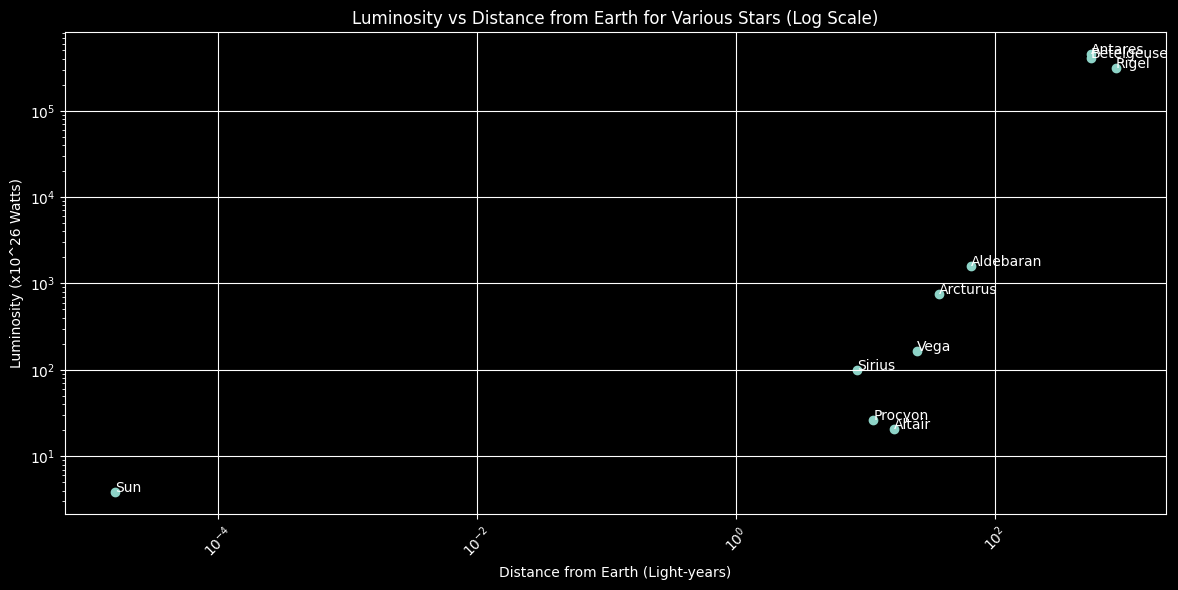

In [21]:
plt.figure(figsize=(12,6))
plt.scatter(distances,luminosityValues)
plt.xlabel("Distance from Earth (Light-years)")
plt.ylabel("Luminosity (x10^26 Watts)")
plt.xscale("log")
plt.yscale("log")
plt.title("Luminosity vs Distance from Earth for Various Stars (Log Scale)")
plt.xticks(rotation=45)
for index,txt in enumerate(starNames):
  plt.annotate(txt,(distances[index],luminosityValues[index]))
plt.tight_layout()
plt.grid(True)
plt.show()

In [22]:
temperatureNeutronStar = 6000000  # Approximate surface temperature in Kelvin
diameterRange = np.linspace(10e3,20e3,500) # From 10 km to 20 km
radiusRange = diameterRange/2
luminosityValues = 4*np.pi*(radiusRange**2)*sigma*temperatureNeutronStar**4

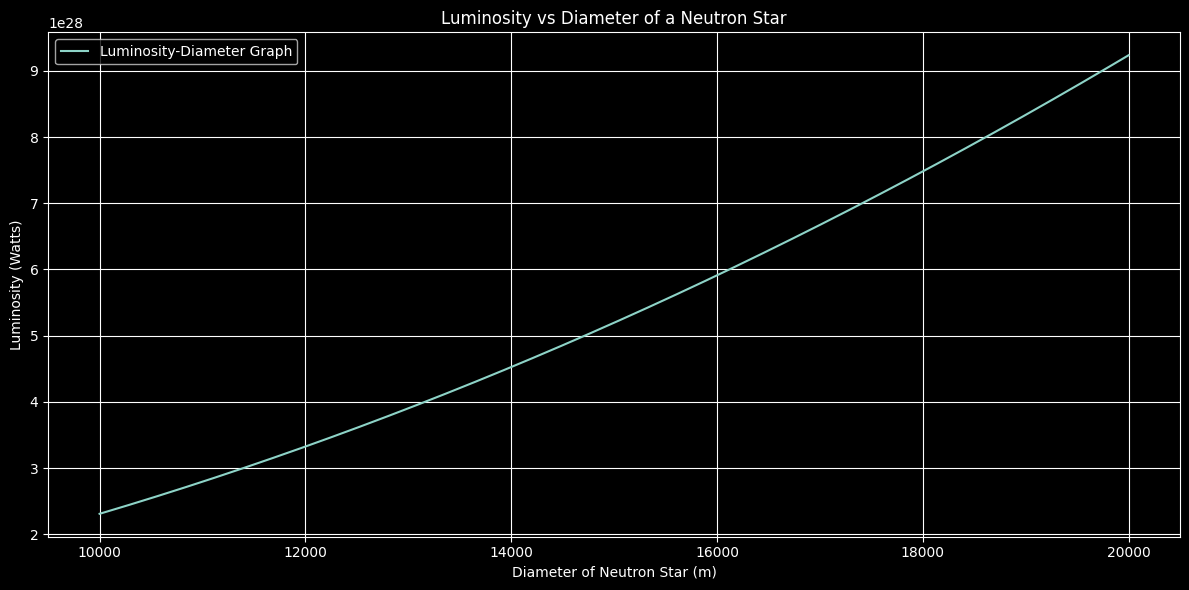

In [23]:
plt.figure(figsize=(12,6))
plt.title("Luminosity vs Diameter of a Neutron Star")
plt.plot(diameterRange,luminosityValues,label="Luminosity-Diameter Graph")
plt.xlabel("Diameter of Neutron Star (m)")
plt.ylabel("Luminosity (Watts)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Planck Spectrum

* The Planck spectrum describes the electromagnetic radiation emitted by a black body in thermal equilibrium at a definite temperature. This spectral distribution is fundamental to the field of quantum mechanics and was first derived by Max Planck in 1900. It marked the birth of quantum theory and was a significant advancement over the classical descriptions of black body radiation.
* Planck’s formula thus resolved a puzzle of classical physics which is known as ultraviolet catastrophe (the integrated intensity of black body radiation in a cavity would diverge according to the laws of classical physics).
* The energy spectrum of a black body of temperature T is given by the Planck function:

> $B(\nu, T) = \frac{2h\nu^3}{c^2} \frac{1}{e^{\frac{h\nu}{kT}} - 1}$

where:

$B(\nu, T)$: the spectral radiance of the black body, which indicates the amount of energy it emits at a specific frequency $\nu$ and temperature $T$.

$h$: Planck's constant ($6.626 \times 10^{-34} Js$)

$\nu$: the frequency of the electromagnetic radiation

$c$: the speed of light in a vacuum ($3.0 \times 10^{8} m/s$)

$k$: the Boltzmann constant ($1.381 \times 10^{-23}J/K$)

$T$: the absolute temperature of the black body in Kelvin (K)

* The Planck spectrum can indeed be expressed in terms of wavelength (λ) instead of frequency (ν):

> $B(\lambda, T) = \frac{2hc^2}{\lambda^5} \frac{1}{e^{\frac{hc}{\lambda kT}} - 1}$

where:

$B_{\lambda}(T)$: the spectral radiance

$\lambda$: the wavelength of the electromagnetic radiation

$h$: Planck's constant

$c$: the speed of light in a vacuum

$k$: the Boltzmann constant

$T$: the absolute temperature of the black body in Kelvin (K)

* Integration over all spatial directions and wavelengths yields the Stefan–
Boltzmann law for the energy flux.

In [24]:
import numpy as np
from scipy.constants import h,c,k

In [25]:
def ConvertKtoRGB(colourTemperature):
    #range check
    if colourTemperature < 1000:
        colourTemperature = 1000
    elif colourTemperature > 40000:
        colourTemperature = 40000
    tmp_internal = colourTemperature / 100.0
    # red
    if tmp_internal <= 66:
        red = 255
    else:
        tmp_red = 329.698727446 * math.pow(tmp_internal - 60, -0.1332047592)
        if tmp_red < 0:
            red = 0
        elif tmp_red > 255:
            red = 255
        else:
            red = tmp_red
    # green
    if tmp_internal <=66:
        tmp_green = 99.4708025861 * math.log(tmp_internal) - 161.1195681661
        if tmp_green < 0:
            green = 0
        elif tmp_green > 255:
            green = 255
        else:
            green = tmp_green
    else:
        tmp_green = 288.1221695283 * math.pow(tmp_internal - 60, -0.0755148492)
        if tmp_green < 0:
            green = 0
        elif tmp_green > 255:
            green = 255
        else:
            green = tmp_green
    # blue
    if tmp_internal >=66:
        blue = 255
    elif tmp_internal <= 19:
        blue = 0
    else:
        tmp_blue = 138.5177312231 * math.log(tmp_internal - 10) - 305.0447927307
        if tmp_blue < 0:
            blue = 0
        elif tmp_blue > 255:
            blue = 255
        else:
            blue = tmp_blue
    return red, green, blue

In [26]:
print(f"Planck Constant: {h}")
print(f"Speed of Light: {c}")
print(f"Boltzmann Constant: {k}")

Planck Constant: 6.62607015e-34
Speed of Light: 299792458.0
Boltzmann Constant: 1.380649e-23


In [27]:
stars = {
    "Bernard Star":DefineStellarParameters(0.196*R_sun,3.13e3*u.K),
    "Sirius A":DefineStellarParameters(1.711*R_sun,9.94e3*u.K),
    "Sirius B":DefineStellarParameters(5.8e3*u.km,2.48e4*u.K),
    "Arcturus":DefineStellarParameters(25.4*R_sun,4.29e3*u.K),
    "Betelgeuse":DefineStellarParameters(6.4e8*u.km,3.59e3*u.K)
}

In [28]:
print("Luminosity of The Stars - Relative to Solar Luminosity:")
for name in stars:
  stars[name]["Luminosity"] = LuminosityCalculation3(stars[name]["Radius"],stars[name]["Temperature"])
  print("\t{:15s} {:.1e} ({:.1e}) ".format(name,stars[name]["Luminosity"],stars[name]["Luminosity"]/L_sun))

Luminosity of The Stars - Relative to Solar Luminosity:
	Bernard Star    1.3e+24 W (3.3e-03) 
	Sirius A        9.9e+27 W (2.6e+01) 
	Sirius B        9.1e+24 W (2.4e-02) 
	Arcturus        7.5e+28 W (2.0e+02) 
	Betelgeuse      4.8e+31 W (1.3e+05) 


In [29]:
def PlanckSpectrum(wavelength:int or float,temperature:int or float)->int or float:
  """
  function computes Planck spectrum of a black body

  wavelength: wavelength in m
  temperature: temperature in K
  """
  return 2*h*c**2/(wavelength**5*(np.exp(h*c/(wavelength*k*temperature))-1))

In [30]:
temperatureSample = np.zeros(len(stars)+1)

In [31]:
for index,key in enumerate(stars):
  temperatureSample[index] = stars[key]["Temperature"].value

In [32]:
temperatureSample

array([ 3130.,  9940., 24800.,  4290.,  3590.,     0.])

In [33]:
temperatureSample[-1] = 5778 # add effective temperature of Sun as last element

In [34]:
temperatureSample = np.sort(temperatureSample) # sort temperatures

In [35]:
nCount = 1000
lambdaMax = 2e-6

In [36]:
# uniformly spaced grid of wavenumbers
wavelengths = np.linspace(lambdaMax/nCount,lambdaMax,nCount)

<ipython-input-29-f4b7b6f1902f>:8: RuntimeWarning: overflow encountered in exp
  return 2*h*c**2/(wavelength**5*(np.exp(h*c/(wavelength*k*temperature))-1))


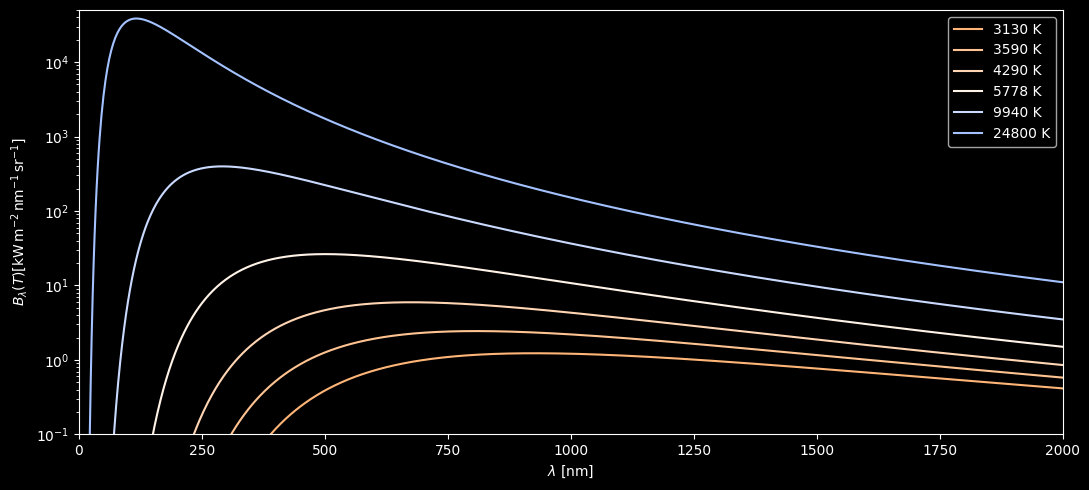

In [37]:
plt.figure(figsize=(11,5))
for temp in temperatureSample:
  # get RGB color corresponding to temperature
  color = tuple([val/255 for val in ConvertKtoRGB(temp)])
  # plot Planck spectrum (wavelength in nm
  # intensity in kW/m^2/nm/sr)
  plt.semilogy(
      1e9*wavelengths,
      1e-12*PlanckSpectrum(wavelengths,temp),
      color=color,
      label="{:.0f} K".format(temp)
  )
plt.xlabel("$\lambda$ [nm]")
plt.xlim(0,1e9*lambdaMax)
plt.ylabel("$B_\lambda(T) $[$\mathrm{kW\,m^{-2}\,nm^{-1}\, sr^{-1}}$]")
plt.ylim(0.1,5e4)
plt.legend(loc="upper right",fontsize=8)
plt.tight_layout()
plt.legend()
plt.show()

**The hottest star in our sample, which is the white dwarf Sirius B, even emits most of its radiation in the UV (below 400 nm).**

## Example

**The spectral radiance of a black body at a wavelength of 800 nm (nanometers) and a temperature of 3000 K (Kelvin) is approximately $9.05 \times 10^{11} W/m^2/m$ (watts per square meter per meter).**

* The chosen wavelength of 800 nm falls in the infrared part of the electromagnetic spectrum. Infrared radiation is often associated with heat.

* The temperature of 3000 K is characteristic of a cooler star when compared to hotter stars like the Sun (which has a surface temperature of about 5778 K). Cooler stars emit more of their radiation in the infrared part of the spectrum.

* According to this law, the amount of radiation emitted at a particular wavelength depends on the temperature of the black body. A lower temperature results in a peak emission at longer wavelengths (as per Wien's Displacement Law), which is why a cooler temperature of 3000 K is more relevant for the 800 nm wavelength.

In [38]:
wavelengthExample = 500e-9 # 800 nm in meters
temperatureExample = 3000 # in Kelvin

In [39]:
def PlanckSpectrum(wavelength:int or float,temperature:int or float)->int or float:
  """
    Calculate the spectral radiance of a black body at a given wavelength and temperature using Planck's Law.

    Parameters:
    wavelength (float): Wavelength in meters.
    temperature (float): Temperature in Kelvin.

    Returns:
    float: Spectral radiance in W/m^2/m (watts per square meter per meter).
  """
  h = 6.62607015e-34 # Planck's constant (Joule second)
  c = 3.0e8 # Speed of light in vacuum (meters per second)
  k = 1.380649e-23 # Boltzmann constant (Joule per Kelvin)
  spectralRadiance = (2*h*c**2)/(wavelength**5)*(1/(np.exp((h * c)/(wavelength*k*temperature))-1))
  return spectralRadiance

In [40]:
radiance = PlanckSpectrum(wavelengthExample,temperatureExample)
print(f"Planck Spectrum - Radiance: {radiance} W/m^2/m")

Planck Spectrum - Radiance: 258903787925.54733 W/m^2/m


In [41]:
starsData = {
    "Sun": {"radius":1, "temperature":5778, "distance":0.0000158},
    "Sirius": {"radius":1.71, "temperature":9940, "distance":8.6},
    "Vega": {"radius":2.362, "temperature":9602, "distance":25},
    "Arcturus": {"radius":25.4, "temperature":4286, "distance":36.7},
    "Betelgeuse": {"radius":887, "temperature":3500, "distance":548},
    "Rigel": {"radius":78.9, "temperature":11000, "distance":860},
    "Aldebaran": {"radius":44.2, "temperature":3910, "distance":65},
    "Procyon": {"radius":2.048, "temperature":6530, "distance":11.46},
    "Altair": {"radius":1.63, "temperature":6900, "distance":16.7},
    "Antares": {"radius":883, "temperature":3600, "distance":550}
}

In [42]:
wavelengthExample = 500e-9 # 500 nm in meters

In [43]:
for star,data in starsData.items():
  temperature = data["temperature"]
  radiance = PlanckSpectrum(wavelengthExample,temperature)
  starsData[star]["radiance"] = radiance

In [44]:
starsData

{'Sun': {'radius': 1,
  'temperature': 5778,
  'distance': 1.58e-05,
  'radiance': 26320669675648.9},
 'Sirius': {'radius': 1.71,
  'temperature': 9940,
  'distance': 8.6,
  'radiance': 222954176895534.4},
 'Vega': {'radius': 2.362,
  'temperature': 9602,
  'distance': 25,
  'radiance': 200205459922619.9},
 'Arcturus': {'radius': 25.4,
  'temperature': 4286,
  'distance': 36.7,
  'radiance': 4617420600466.487},
 'Betelgeuse': {'radius': 887,
  'temperature': 3500,
  'distance': 548,
  'radiance': 1020316640725.5724},
 'Rigel': {'radius': 78.9,
  'temperature': 11000,
  'distance': 860,
  'radiance': 300400044653524.4},
 'Aldebaran': {'radius': 44.2,
  'temperature': 3910,
  'distance': 65,
  'radiance': 2418592297174.2007},
 'Procyon': {'radius': 2.048,
  'temperature': 6530,
  'distance': 11.46,
  'radiance': 46975899526372.56},
 'Altair': {'radius': 1.63,
  'temperature': 6900,
  'distance': 16.7,
  'radiance': 59703258253835.84},
 'Antares': {'radius': 883,
  'temperature': 3600,
  

In [45]:
temperature = [data["temperature"] for data in starsData.values()]

In [46]:
spectralRadiance = [data["radiance"] for data in starsData.values()]

In [47]:
starNames = list(starsData.keys())

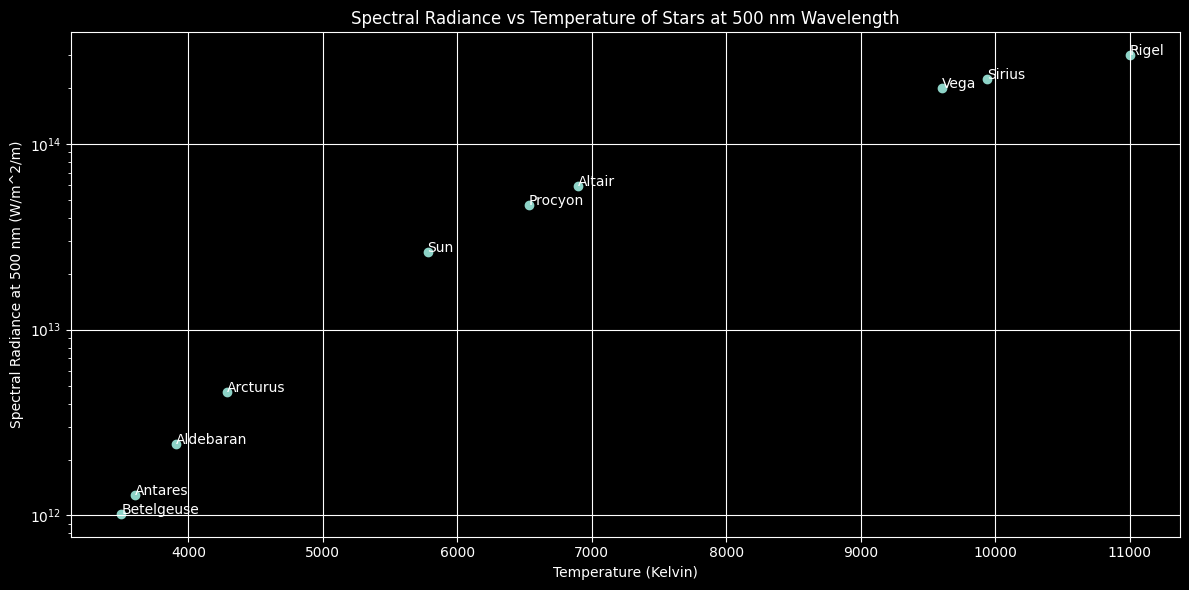

In [48]:
plt.figure(figsize=(12,6))
plt.scatter(temperature,spectralRadiance)
plt.xlabel("Temperature (Kelvin)")
plt.ylabel("Spectral Radiance at 500 nm (W/m^2/m)")
plt.title("Spectral Radiance vs Temperature of Stars at 500 nm Wavelength")
plt.yscale("log")
for index,txt in enumerate(starNames):
  plt.annotate(txt,(temperature[index],spectralRadiance[index]))
plt.grid(True)
plt.tight_layout()
plt.show()

# Wien’s Displacement Law

* Wien's Displacement Law is a law in physics that describes the relationship between the temperature of a black body and the wavelength at which it emits the most radiation.
* The law states that the wavelength of the peak emission of a black body is inversely proportional to its temperature:

> $\lambda_{\text{max}} = \frac{b}{T}$

where:

$\lambda_{\text{max}}$: the wavelength at which the emission is maximum (in meters)

$T$: the absolute temperature of the black body (in Kelvin).

$b$: Wien's displacement constant, approximately ($2.897771955 \times 10^{-3}meter-Kelvin$)

* This law implies that as the temperature of a black body increases, the peak of its emission spectrum shifts to shorter wavelengths. This is why, for example, a heating iron glows red at lower temperatures and white at higher temperatures.
* Wien's Displacement Law is critical in astrophysics for determining the temperatures of stars. By observing the color of a star, scientists can estimate its surface temperature.

In [49]:
def WienLawPeakWavelength(temperature:int or float)->int or float:
  """
    Calculate the peak emission wavelength of a black body based on its temperature using Wien's Displacement Law.

    Parameters:
    temperature (float): Temperature of the black body in Kelvin.

    Returns:
    float: Peak emission wavelength in meters.
"""
  wien = 2.897771955e-3 # Wien's displacement constant in meter-Kelvin
  return wien/temperature

In [50]:
temperatureSun = 5778 # Temperature of the sun in Kelvin

In [54]:
peakWavelength = WienLawPeakWavelength(temperatureSun)
print(f"Peak Emission Wavelength for Sun: {peakWavelength*1e+9} nm")

Peak Emission Wavelength for Sun: 501.51816458982347 nm


* The color of a star is related to the peak wavelength of the light it emits, and this peak wavelength can be used to estimate the star's surface temperature.

* Each star emits radiation with a spectrum that peaks at a certain wavelength. The color of this peak wavelength is indicative of the star's surface temperature. For example, hotter stars emit more blue light, and cooler stars emit more red light.

In [53]:
temperatureBetelgeuse = 3500  # in Kelvin

In [55]:
peakWavelength = WienLawPeakWavelength(temperatureBetelgeuse)
print(f"Peak Emission Wavelength for Betelgeuse: {peakWavelength*1e+9} nm")

Peak Emission Wavelength for Betelgeuse: 827.9348442857143 nm


**Since Betelgeuse is a red supergiant, we expect this wavelength to fall within the red part of the visible spectrum (roughly 620 to 750 nanometers).**

## Example

**Using Wien's Displacement Law, we've calculated the surface temperature of a hypothetical star with a peak emission wavelength of 700 nm (nanometers) to be approximately 4139.67 Kelvin.**

**This calculation suggests that if a star's light peaks at 700 nm, which is in the red part of the visible spectrum, its surface temperature would be around 4139.67 Kelvin. This is cooler than our Sun (which has a surface temperature of about 5778 Kelvin) and is consistent with the star emitting more red light due to its lower temperature. Such a star would likely be classified as a cooler star, possibly a red giant or a similar type of star.**

In [56]:
# Example: Hypothetical star with a peak emission wavelength of 700 nm (nanometers)
peakWavelength = 700e-9 # 700 nm in meters

In [57]:
# Calculate the surface temperature of a black body based on its peak emission wavelength using Wien's Displacement Law.
temperatureHypotheticalStar = 2.897771955e-3/peakWavelength
print(f"Surface Temperature for Hypothetical Star: {temperatureHypotheticalStar} K")

Surface Temperature for Hypothetical Star: 4139.674221428571 K


## Example

* The Sun has various layers with different temperatures:
  - Photosphere (Surface layer): Approximate Temperature ~ 5778 K
  - Chromosphere: Approximate Temperature ~ 5000 K
  - Corona: Approximate Temperature ~ 1,000,000 K

In [58]:
temperatureSunLayers = {
    "Photosphere":5778,
    "Chromosphere":5000,
    "Corona":1000000
}

In [59]:
peakWavelengths = {
    layer: f"{WienLawPeakWavelength(temp)*1e9} nm" for layer,temp in temperatureSunLayers.items()
}

In [60]:
peakWavelengths

{'Photosphere': '501.51816458982347 nm',
 'Chromosphere': '579.554391 nm',
 'Corona': '2.897771955 nm'}

**`Photosphere`: The surface layer of the Sun, with a temperature of about 5778 Kelvin, has a peak emission wavelength of approximately 501.52 nm (nanometers). This wavelength falls in the visible light spectrum, which is why sunlight appears white to our eyes.**

**`Chromosphere`: This layer of the Sun, with a temperature of about 5000 Kelvin, has a peak emission wavelength of approximately 579.55 nm. This wavelength also falls in the visible spectrum, close to the yellow/orange part.**

**`Corona`: The outermost layer of the Sun's atmosphere, with a much higher temperature of about 1,000,000 Kelvin, has a peak emission wavelength of approximately 2.90 nm. This wavelength falls in the X-ray region of the electromagnetic spectrum. The corona's high temperature is why it emits in the X-ray range, which is not visible to the naked eye.**

# Magnitude System

* In astronomy, the observed brightness of celestial objects is quantified using a logarithmic scale known as the magnitude system.
* This system measures the brightness of an object as seen from Earth (apparent magnitude) or as it would be seen at a standard distance (absolute magnitude).
* The magnitude scale is based on flux ratios, where the flux is the amount of light energy coming from the object per unit area per unit time:

> $m_2 - m_1 = -2.5 \log_{10}\left(\frac{F_2}{F_1}\right)$

where:

$m1$ & $m2$: the magnitudes of the two objects

$F_1$ & $F_2$: the fluxes of the two objects

$factor (\text{-2.5})$: ensures that an object 100 times brighter than another object has a magnitude 5 units smaller

or

> $m = M -2.5 \log_{10}\left(\frac{F}{F_0}\right)$
  - The convention is to define $F_0=\frac{L}{4 \pi r^{2}_{0}}$ as the radiative flux at distance $r_{0}=10pc$
  - While the absolute magnitude $M$ is a constant parameter for a star of given luminosity $L$, the star’s apparent magnitude $m$ depends on its distance $r$, the relation $F \propto \frac{1}{r^{2}}$
  - for the radiative flux implies:
    > $m - M= 5 \log_{10}\left(\frac{r}{10pc}\right)$
  - Hence, the distance of the star can be determined if both the apparent and absolute magnitude are known. However, extinction due to interstellar dust modifies this relation:
   > $m - M= 5 \log_{10}\left(\frac{r}{10pc}\right)+kr$
   - the mean value of $k$ is $2 \times 10^{-3}pc^{-1}$ can be assumed for the extinction per unit distance.

* This logarithmic relationship was originally developed by the ancient Greek astronomer Hipparchus, and it aligns well with the logarithmic response of the human eye to light.

In [68]:
def CalculateStarDistance(apparentMagnitude:int or float,absoluteMagnitude:int or float,coeff:float=2e-3)->int or float:
  """
    Calculate the distance of a star based on its apparent magnitude, absolute magnitude, and extinction.

    Parameters:
    apparentMagnitude (float): Apparent magnitude of the star.
    absoluteMagnitude (float): Absolute magnitude of the star.
    coeff (float): Extinction per unit distance (default value 2e-3 pc^-1).

    Returns:
    float: Distance of the star in parsecs.
  """
  # Calculate distance ignoring extinction
  distanceNoExtinction = 10**((apparentMagnitude-absoluteMagnitude)/5+1)
  # Adjust for extinction
  distance = distanceNoExtinction-coeff*distanceNoExtinction**2
  return distance

In [71]:
apparentMagnitude = -26.74 # Apparent magnitude of the Sun as seen from Earth
absoluteMagnitude = 4.83 # Absolute magnitude of the Sun

In [73]:
distanceSun = CalculateStarDistance(apparentMagnitude,absoluteMagnitude)
print(f"Distance To Sun: {distanceSun} pc or {distanceSun*206265} AU")

Distance To Sun: 4.852884954520224e-06 pc or 1.000980315144114 AU
